In [594]:
import numpy as np
def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def database_entropy(x, y, labels):
    unique_labels = np.unique(labels)
    
    x_entropies = []
    y_entropies = []
    
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        x_entropy = calculate_entropy(x[label_indices])
        y_entropy = calculate_entropy(y[label_indices])
        
        x_entropies.append(x_entropy)
        y_entropies.append(y_entropy)
    
    avg_x_entropy = np.mean(x_entropies)
    avg_y_entropy = np.mean(y_entropies)
    
    database_entropy = (avg_x_entropy + avg_y_entropy) / 2
    
    return database_entropy

In [595]:
def calculate_sse(x, y, labels, centroids):
    sse = 0
    for i in range(len(x)):
        centroid = centroids[labels[i]]
        sse += (x[i] - centroid[0])**2 + (y[i] - centroid[1])**2
    return sse

讀取 Banana 資料

In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data = pd.read_csv("banana  (with class label).csv")

In [612]:
X = Data['x'];
Y = Data['y'];
C = Data['class'];
C = C - 1
data = np.array(list(zip(X, Y)))

Banana 原始訊號分類

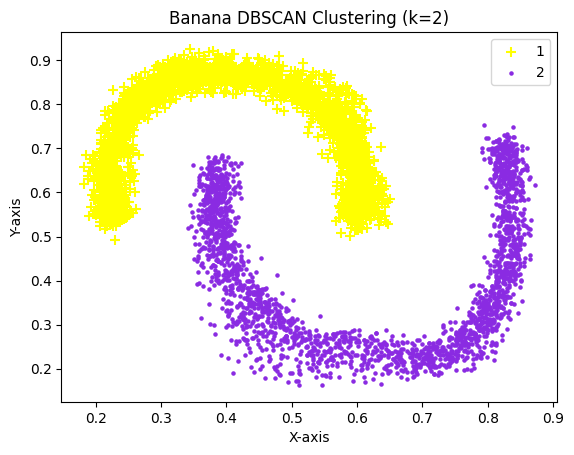

In [613]:
# 繪製原始資料點
plt.scatter(X[C == 0], Y[C == 0], c='yellow', marker='+', label='1', s=50)
plt.scatter(X[C == 1], Y[C == 1], c='blueviolet', marker='o', label='2', s=5)
# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Banana DBSCAN Clustering (k=2)')
# 顯示圖表
plt.legend()
plt.show()

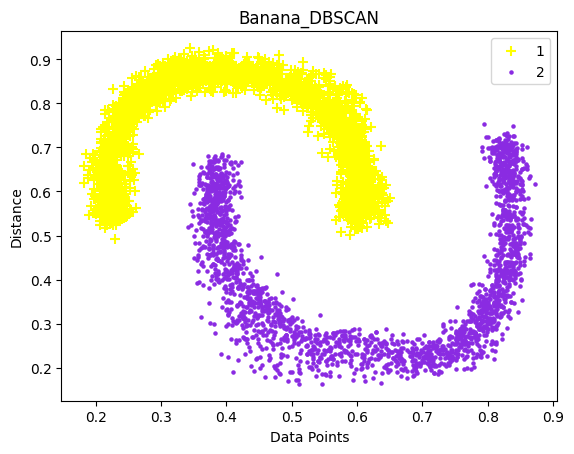

In [614]:
Eps, Min_samples = 0.05,1
import time
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
# 使用 DBSCAN 進行分群
start = time.time()
dbscan = DBSCAN(eps=Eps, min_samples=Min_samples)  # 調整 eps 和 min_samples 參數
labels = dbscan.fit_predict(data)
end = time.time()

# 繪製散點圖，每個分群用不同的顏色表示
plt.scatter(X[labels == 0], Y[labels == 0], c='yellow', marker='+', label='1', s=50)
plt.scatter(X[labels == 1], Y[labels == 1], c='blueviolet', marker='o', label='2', s=5)


plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Banana_DBSCAN')
plt.legend()
plt.show()

Banana 參數

In [600]:
centroids = {
    0: [np.mean(X[labels == 0]), np.mean(Y[labels == 0])],
    1: [np.mean(X[labels == 1]), np.mean(Y[labels == 1])]
}
print("執行時間：%f 秒" % (end - start))
accuracy = accuracy_score(C, labels)
print(f'Accuracy: {accuracy}')
sse = calculate_sse(X, Y, labels, centroids)
print(f'Sum of Squared Errors (SSE): {sse}')
entropy = database_entropy(X, Y, labels)
print(f"Entropy：{entropy}")

執行時間：0.030999 秒
Accuracy: 1.0
Sum of Squared Errors (SSE): 227.11916590178683
Entropy：8.515095154933189


讀取 sizes3 資料

In [601]:
import pandas as pd
import numpy as np
Data = pd.read_csv("sizes3 (with class label).csv")

In [602]:
X = Data['x'];
Y = Data['y'];
C = Data['class'];
data = np.array(list(zip(X, Y)))

sizes3 原始訊號分類

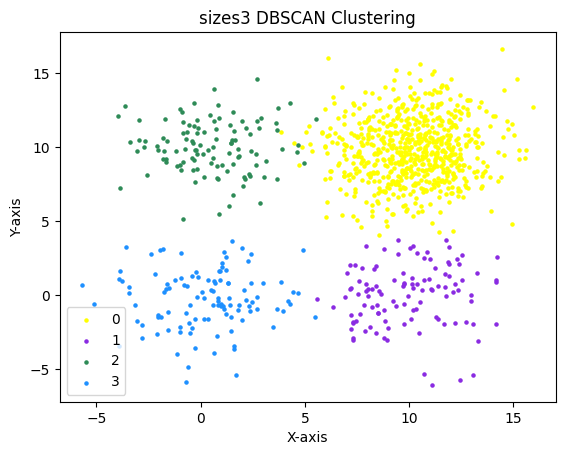

In [603]:
# 繪製原始資料點
plt.scatter(X[C == 0], Y[C == 0], c='yellow', marker='o', label='0', s=5)
plt.scatter(X[C == 1], Y[C == 1], c='blueviolet', marker='o', label='1', s=5)
plt.scatter(X[C == 2], Y[C == 2], c='seagreen', marker='o', label='2', s=5)
plt.scatter(X[C == 3], Y[C == 3], c='dodgerblue', marker='o', label='3', s=5)

# 加上標籤和標題
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'sizes3 DBSCAN Clustering')
# 顯示圖表
plt.legend()
plt.show()

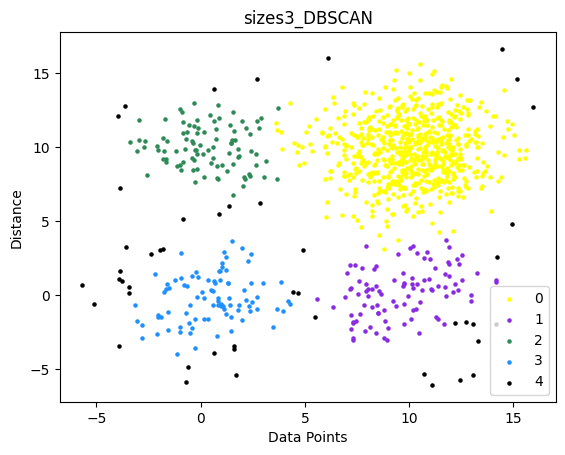

In [607]:
Eps, Min_samples = 1.7,17
import time
from sklearn.cluster import DBSCAN

# 使用 DBSCAN 進行分群
start = time.time()
dbscan = DBSCAN(eps=Eps, min_samples=Min_samples)  # 調整 eps 和 min_samples 參數
labels = dbscan.fit_predict(data)
end = time.time()
labels[labels == -1] = 4

# 繪製散點圖，每個分群用不同的顏色表示
plt.scatter(X[labels == 0], Y[labels == 0], c='yellow', marker='o', label='0', s=5)
plt.scatter(X[labels == 1], Y[labels == 1], c='blueviolet', marker='o', label='1', s=5)
plt.scatter(X[labels == 2], Y[labels == 2], c='seagreen', marker='o', label='2', s=5)
plt.scatter(X[labels == 3], Y[labels == 3], c='dodgerblue', marker='o', label='3', s=5)
plt.scatter(X[labels == 4], Y[labels == 4], c='black', marker='o', label='4', s=5)

plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('sizes3_DBSCAN')
plt.legend()
plt.show()

In [605]:
centroids = {
    0: [np.mean(X[labels == 0]), np.mean(Y[labels == 0])],
    1: [np.mean(X[labels == 1]), np.mean(Y[labels == 1])],
    2: [np.mean(X[labels == 2]), np.mean(Y[labels == 2])],
    3: [np.mean(X[labels == 3]), np.mean(Y[labels == 3])],
    4: [np.mean(X[labels == 4]), np.mean(Y[labels == 4])]
}
print("執行時間：%f 秒" % (end - start))
accuracy = accuracy_score(C, labels)
print(f'Accuracy: {accuracy}')
sse = calculate_sse(X, Y, labels, centroids)
print(f'Sum of Squared Errors (SSE): {sse}')
entropy = database_entropy(X, Y, labels)
print(f"Entropy：{entropy}")

執行時間：0.006000 秒
Accuracy: 0.944
Sum of Squared Errors (SSE): 11730.153471368589
Entropy：6.912388758642177


TEST

In [606]:
# temp_sse = 2000000;
# # teps,tmin_sample = 0.0,0
# for I in range(1,51):
#     i = I/10;
    
#     for J in range(1,21):
#         dbscan = DBSCAN(eps=i, min_samples=J)  # 調整 eps 和 min_samples 參數
#         labels = dbscan.fit_predict(data)
#         if len(set(labels)) == 5 or len(set(labels)) == 4:
#             labels[labels == -1] = 4
#             centroids = {
#                 0: [np.mean(X[labels == 0]), np.mean(Y[labels == 0])],
#                 1: [np.mean(X[labels == 1]), np.mean(Y[labels == 1])],
#                 2: [np.mean(X[labels == 2]), np.mean(Y[labels == 2])],
#                 3: [np.mean(X[labels == 3]), np.mean(Y[labels == 3])],
#                 4: [np.mean(X[labels == 4]), np.mean(Y[labels == 4])]
#                 }
#             sse = calculate_sse(X, Y, labels, centroids)
#             if temp_sse > sse:
#                 temp_sse = sse.copy()
#                 teps,tmin_sample = i,J;
# print(teps,tmin_sample)
